# Develop regression models

In [1]:
import os

import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

from sklearn import preprocessing
import tensorflow as tf
import tensorflow_probability as tfp

### Load data

In [2]:
DATA_DIR = '/home/daitran/Desktop/git/soil_properties/data'

In [3]:
ntb_data_path = os.path.join(DATA_DIR, 'NTB_black_data.csv')
tb_data_path = os.path.join(DATA_DIR, 'TB_blue_data.csv')

In [4]:
ntb_data= pd.read_csv(ntb_data_path)
tb_data = pd.read_csv(tb_data_path)

### Data pre-processing

In [5]:
ntb_data

,Name,X,Y,Elevation,Soi properties (main)
0,NTB-1,549723.89,213802.88,28.5,reclaimed layer
1,NTB-1,549723.89,213802.88,26.0,sedimentary layer
2,NTB-1,549723.89,213802.88,21.5,weathered soil
3,NTB-1,549723.89,213802.88,7.7,weathered rock
4,NTB-1,549723.89,213802.88,-0.3,soft rock
...,...,...,...,...,...
91,NTB-12,549564.60,213804.70,14.5,weathered rock
92,NTB-12,549564.60,213804.70,7.5,moderate rock
93,NTB-12,549564.60,213804.70,-10.5,hard rock
94,NTB-12,549564.60,213804.70,-13.5,moderate rock


In [6]:
tb_data

,Name,X,Y,Elevation,Soi properties (main)
0,TB-1,549699.0411,213765.3279,128.60,reclaimed layer
1,TB-1,549699.0411,213765.3279,126.60,sedimentary layer
2,TB-1,549699.0411,213765.3279,117.60,weathered soil
3,TB-1,549699.0411,213765.3279,108.10,weathered rock
4,TB-1,549699.0411,213765.3279,94.60,soft rock
...,...,...,...,...,...
111,TB-22,550622.5600,213730.7000,134.49,reclaimed layer
112,TB-22,550622.5600,213730.7000,114.19,weathered soil
113,TB-22,550622.5600,213730.7000,104.19,weathered rock
114,TB-22,550622.5600,213730.7000,93.69,soft rock


In [7]:
ntb_names = ntb_data['Soi properties (main)']
tb_names = tb_data['Soi properties (main)']

In [8]:
assign_num_list = {'topsoil layer': 0,
                      'weathered rock': 1,
                      'hard rock': 2,
                      'soft rock': 3,
                      'weathered soil': 4,
                      'colluvial layer': 5,
                      'moderate rock': 6,
                      'sedimentary layer': 7,
                      'reclaimed layer': 8}

In [9]:
ntb_target = ntb_names.replace(assign_num_list)
tb_target = tb_names.replace(assign_num_list)

In [10]:
ntb_data['Target'] = ntb_target
tb_data['Target'] = tb_target

In [11]:
ntb_data

,Name,X,Y,Elevation,Soi properties (main),Target
0,NTB-1,549723.89,213802.88,28.5,reclaimed layer,8
1,NTB-1,549723.89,213802.88,26.0,sedimentary layer,7
2,NTB-1,549723.89,213802.88,21.5,weathered soil,4
3,NTB-1,549723.89,213802.88,7.7,weathered rock,1
4,NTB-1,549723.89,213802.88,-0.3,soft rock,3
...,...,...,...,...,...,...
91,NTB-12,549564.60,213804.70,14.5,weathered rock,1
92,NTB-12,549564.60,213804.70,7.5,moderate rock,6
93,NTB-12,549564.60,213804.70,-10.5,hard rock,2
94,NTB-12,549564.60,213804.70,-13.5,moderate rock,6


In [12]:
tb_data

,Name,X,Y,Elevation,Soi properties (main),Target
0,TB-1,549699.0411,213765.3279,128.60,reclaimed layer,8
1,TB-1,549699.0411,213765.3279,126.60,sedimentary layer,7
2,TB-1,549699.0411,213765.3279,117.60,weathered soil,4
3,TB-1,549699.0411,213765.3279,108.10,weathered rock,1
4,TB-1,549699.0411,213765.3279,94.60,soft rock,3
...,...,...,...,...,...,...
111,TB-22,550622.5600,213730.7000,134.49,reclaimed layer,8
112,TB-22,550622.5600,213730.7000,114.19,weathered soil,4
113,TB-22,550622.5600,213730.7000,104.19,weathered rock,1
114,TB-22,550622.5600,213730.7000,93.69,soft rock,3


In [13]:
X_train_ntb = ntb_data[['X','Y','Elevation']].to_numpy()
y_train_ntb = ntb_data['Target'].to_numpy()

X_train_tb = tb_data[['X','Y','Elevation']].to_numpy()
y_train_tb = tb_data['Target'].to_numpy()

In [14]:
# https://scikit-learn.org/stable/modules/preprocessing.html
# Minmax scaler
# Standart Scaler
# 

normalizer = preprocessing.MinMaxScaler()

normalized_X_train_ntb = normalizer.fit_transform(X_train_ntb)
normalized_X_train_tb = normalizer.fit_transform(X_train_tb)
# normalized_train_X

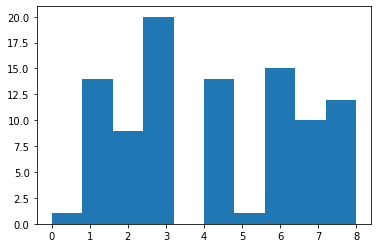

In [57]:
plt.hist(y_train_ntb)
plt.show()

## Regression model with NTB dataset

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop

###  Shallow ANN

In [58]:
model = Sequential()
model.add(Dense(10, input_dim=3, kernel_initializer='normal', activation='relu'))
model.add(Dense(10, input_dim=3, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='linear'))

In [59]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                40        
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [61]:
model.fit(normalized_X_train_ntb, y_train_ntb, epochs = 1000, verbose=0)

In [62]:
model.evaluate(normalized_X_train_tb, y_train_tb)

4/4 [==============================] - 0s 1ms/step - loss: 5.2436


5.243572235107422

In [63]:
normalized_X_train_ntb[0]

array([0.14558671, 0.35072645, 0.75531434])

In [64]:
model.predict(normalized_X_train_ntb[0:10])

array([[5.171805 ],
       [5.0563927],
       [4.848649 ],
       [4.2115703],
       [3.8422487],
       [3.5652578],
       [3.4267623],
       [3.1497712],
       [3.0482078],
       [5.1353583]], dtype=float32)

In [65]:
y_train_ntb[0:10]

array([8, 7, 4, 1, 3, 6, 3, 6, 3, 8])